# BioMED VLM

## 1. BioMED Image-Text-to-Text microsoft/llava-med-v1.5-mistral-7b

[microsoft/llava-med-v1.5-mistral-7b](https://huggingface.co/microsoft/llava-med-v1.5-mistral-7b)

In [1]:
%pip install -q torch==2.0.1 torchvision==0.15.2 transformers==4.31.0 accelerate==0.21.0 bitsandbytes==0.41.0 llava-torch==1.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.9/809.9 kB 53.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
from llava.constants import DEFAULT_IMAGE_TOKEN, IMAGE_TOKEN_INDEX
from llava.conversation import SeparatorStyle, conv_templates
from llava.mm_utils import (
    KeywordsStoppingCriteria,
    get_model_name_from_path,
    process_images,
    tokenizer_image_token,
)
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init
from PIL import Image

[2025-01-21 07:00:26,644] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [3]:
disable_torch_init()
MODEL = "microsoft/llava-med-v1.5-mistral-7b"
model_name = get_model_name_from_path(MODEL)
model_name

'llava-med-v1.5-mistral-7b'

In [4]:
tokenizer, model, image_processor, context_len = load_pretrained_model(model_path=MODEL, model_base=None, model_name=model_name, load_4bit=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

You are using the legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

You are using a model of type llava_mistral to instantiate a model of type llava. This is not supported for all configurations of models and can yield errors.


model.safetensors.index.json:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/262M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of LlavaLlamaForCausalLM were not initialized from the model checkpoint at microsoft/llava-med-v1.5-mistral-7b and are newly initialized: ['model.layers.31.self_attn.rotary_emb.inv_freq', 'model.layers.20.self_attn.rotary_emb.inv_freq', 'model.layers.1.self_attn.rotary_emb.inv_freq', 'model.layers.3.self_attn.rotary_emb.inv_freq', 'model.layers.27.self_attn.rotary_emb.inv_freq', 'model.layers.29.self_attn.rotary_emb.inv_freq', 'model.layers.0.self_attn.rotary_emb.inv_freq', 'model.layers.19.self_attn.rotary_emb.inv_freq', 'model.layers.22.self_attn.rotary_emb.inv_freq', 'model.layers.5.self_attn.rotary_emb.inv_freq', 'model.layers.16.self_attn.rotary_emb.inv_freq', 'model.layers.28.self_attn.rotary_emb.inv_freq', 'model.layers.8.self_attn.rotary_emb.inv_freq', 'model.layers.10.self_attn.rotary_emb.inv_freq', 'model.layers.2.self_attn.rotary_emb.inv_freq', 'model.layers.21.self_attn.rotary_emb.inv_freq', 'model.layers.7.self_attn.rotary_emb.inv_freq', 'model.layers.24.self_

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

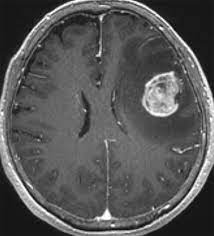

In [5]:
image_file = "/content/brain_xray-1.jpeg"
image = Image.open(image_file).convert("RGB")
image

In [6]:
def process_image(image):
    args = {"image_aspect_ratio": "pad"}
    image_tensor = process_images([image], image_processor, args)
    return image_tensor.to(model.device, dtype=torch.float16)

In [7]:
processed_image = process_image(image)
type(processed_image), processed_image.shape

(torch.Tensor, torch.Size([1, 3, 336, 336]))

In [8]:
CONV_MODE = "llava_v0"

def create_prompt(prompt: str):
    conv = conv_templates[CONV_MODE].copy()
    roles = conv.roles
    prompt = DEFAULT_IMAGE_TOKEN + "\n" + prompt
    conv.append_message(roles[0], prompt)
    conv.append_message(roles[1], None)
    return conv.get_prompt(), conv

prompt, conv = create_prompt("What type of imaging does this represent?")
print("prompt:", prompt, "\nconv:", conv)

prompt: A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.###Human: <image>
What type of imaging does this represent?###Assistant: 
conv: Conversation(system="A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.", roles=('Human', 'Assistant'), messages=[['Human', '<image>\nWhat type of imaging does this represent?'], ['Assistant', None]], offset=0, sep_style=<SeparatorStyle.SINGLE: 1>, sep='###', sep2=None, version='Unknown', skip_next=False)


In [9]:
def ask_image(image: Image, prompt: str):
    print("I got his prompt:", prompt)

    image_tensor = process_image(image)
    prompt, conv = create_prompt(prompt)
    input_ids = (
        tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
        .unsqueeze(0)
        .to(model.device)
    )

    stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
    stopping_criteria = KeywordsStoppingCriteria(
        keywords=[stop_str], tokenizer=tokenizer, input_ids=input_ids
    )

    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=image_tensor,
            do_sample=True,
            temperature=0.01,
            max_new_tokens=512,
            use_cache=True,
            stopping_criteria=[stopping_criteria],
        )
        print("decoded output_ids", tokenizer.decode(output_ids[0, input_ids.shape[1]:])) #input_ids.shape[1] :
    return tokenizer.decode(
        output_ids[0, input_ids.shape[1] :], skip_special_tokens=True
    ).strip()

In [17]:
## 1
# query = "a photography of"

## 2
# query = """Analyze the provided photograph and perform the following tasks:
#             1. Identification: Describe the key features or abnormalities visible in the image.
#             2. Prognosis: Suggest potential implications or diagnoses based on the identified features (if applicable).
#             3. Description: Provide a detailed summary of the observed structures, focusing on medical relevance."""

## 3
query = "do the prognosis of the given medical image"

## 4
# query = "What type of imaging does this represent?"

In [18]:
result = ask_image(image, query)
result

I got his prompt: do the prognosis of the given medical image
decoded output_ids  The prognosis of the given medical image is considered to be poor. </s>


'The prognosis of the given medical image is considered to be poor.'

## 2. BioMED Image-Text-to-Text MBZUAI/BiMediX2-8B

[BiMediX2](https://huggingface.co/collections/MBZUAI/bimedix2-675ee7528464dfd03f746127)

In [5]:
%pip install -q --upgrade transformers
%pip install -q accelerate
%pip install -q llava-torch

In [1]:
import textwrap

import torch
from llava.constants import DEFAULT_IMAGE_TOKEN, IMAGE_TOKEN_INDEX
from llava.conversation import SeparatorStyle, conv_templates
from llava.mm_utils import (
    KeywordsStoppingCriteria,
    get_model_name_from_path,
    process_images,
    tokenizer_image_token,
)
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init
from PIL import Image

In [2]:
disable_torch_init()
MODEL = "MBZUAI/BiMediX2-8B"
model_name = get_model_name_from_path(MODEL)
model_name

'BiMediX2-8B'

In [4]:
tokenizer, model, image_processor, context_len = load_pretrained_model(model_path=MODEL, model_base=None, model_name=model_name, load_4bit=False)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


ValueError: `rope_scaling` must be a dictionary with with two fields, `type` and `factor`, got {'factor': 8.0, 'high_freq_factor': 4.0, 'low_freq_factor': 1.0, 'original_max_position_embeddings': 8192, 'rope_type': 'llama3'}

In [13]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "MBZUAI/BiMediX2-8B"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

ValueError: `rope_scaling` must be a dictionary with with two fields, `type` and `factor`, got {'factor': 8.0, 'high_freq_factor': 4.0, 'low_freq_factor': 1.0, 'original_max_position_embeddings': 8192, 'rope_type': 'llama3'}

## 3. BioMED Image-Text-to-Text ContactDoctor/Bio-Medical-MultiModal-Llama-3-8B-V1

[ContactDoctor/Bio-Medical-MultiModal-Llama-3-8B-V1](https://huggingface.co/ContactDoctor/Bio-Medical-MultiModal-Llama-3-8B-V1)

In [10]:
%pip freeze > requirements.txt

In [1]:
import textwrap

import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer

In [4]:
# Load the model and tokenizer
model = AutoModel.from_pretrained("ContactDoctor/Bio-Medical-MultiModal-Llama-3-8B-V1", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("ContactDoctor/Bio-Medical-MultiModal-Llama-3-8B-V1", trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
# Check if CUDA is available
if torch.cuda.is_available():
    # Move the model to the GPU
    # model = model.to("cuda")
    print("CUDA is available. Using GPU.")
else:
    print("CUDA is not available. Using CPU.")

OutOfMemoryError: CUDA out of memory. Tried to allocate 224.00 MiB. GPU 0 has a total capacity of 22.17 GiB of which 150.88 MiB is free. Process 121191 has 22.01 GiB memory in use. Of the allocated memory 21.83 GiB is allocated by PyTorch, and 1.24 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [4]:
# Load an image and tokenize a text input

image_uri = "/content/brain_xray-1.jpeg"
image = Image.open(image_uri).convert('RGB')

## 1
# query = "a photography of"

## 2
# query = """Analyze the provided photograph and perform the following tasks:
#             1. Identification: Describe the key features or abnormalities visible in the image.
#             2. Prognosis: Suggest potential implications or diagnoses based on the identified features (if applicable).
#             3. Description: Provide a detailed summary of the observed structures, focusing on medical relevance."""

## 3
# query = "do the prognosis of the given medical image"

## 4
# query = "What type of imaging does this represent?"

## 5
query = "What is the diagnosis for this patient?"

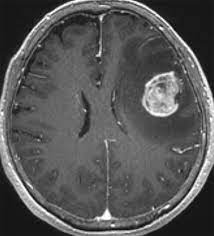

In [5]:
image

In [6]:
inputs = tokenizer(query, return_tensors="pt")

In [7]:
# Create a message with the image and text input
message = [{'role': 'user', 'content': [image, query]}]

In [17]:
# Generate a response using the model
response = model.chat(image=image, msgs=message, tokenizer=tokenizer, sampling=True, temperature=0.95, stream=True)

In [18]:
# Print the generated response
generated_text = ""
for resp in response:
    generated_text += resp
    print(resp, flush=True, end='')

Based on the MRI findings, the patient has been diagnosed with a right parietal mass that has spread to the brainstem and cerebellum. The T1-weighted post-gadolinium image shows hyperintense enhancement in the region of the mass, which is consistent with the presence of an enhancing lesion. The T2-weighted image demonstrates mixed signal intensity within the mass, suggesting a heterogeneous composition. These imaging features are characteristic of a brain tumor, and further clinical evaluation would be necessary to determine the specific type and grade of the tumor.

In [19]:
wrapped_generated_text = textwrap.fill(generated_text, width=100)
print(wrapped_generated_text)

Based on the MRI findings, the patient has been diagnosed with a right parietal mass that has spread
to the brainstem and cerebellum. The T1-weighted post-gadolinium image shows hyperintense
enhancement in the region of the mass, which is consistent with the presence of an enhancing lesion.
The T2-weighted image demonstrates mixed signal intensity within the mass, suggesting a
heterogeneous composition. These imaging features are characteristic of a brain tumor, and further
clinical evaluation would be necessary to determine the specific type and grade of the tumor.
